In [ ]:
!pip install tensorflow

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

The selected dataset is the wine quality dataset. The wine industry demands a high standard of quality and control in its products. Often, the quality of wine is tested using tasters, who, while doing a great job, have limited testing capacity, are costly, and cannot be employed as corrective measures at the time of wine production. A versatile solution for determining wine quality is the use of machine learning, utilizing the data collected from the physicochemical properties of the wine. This way, a model can be trained to predict wine quality, detect defects, and control quality. It also allows the integration of IoT devices for real-time monitoring of fermentation processes, which helps with the early execution of corrective processes or optimization of fermentation.

The plan is to build a machine learning model using random forest and neural networks. The objective is to predict wine quality. First, a classification approach will be evaluated, where a new label for quality ('low', 'medium', 'high') is proposed for this approach. The metrics to be implemented for evaluating the model's performance are:

*   Accuracy
*   Precision
*   Recall
*   F1 Score





# Importing Data





In [ ]:
df=pd.read_csv('https://archive.ics.uci.edu/static/public/186/data.csv',sep=',')

In [ ]:
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
df.isnull().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.isna().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


After uploading the dataset to a DataFrame, it's important to check for NaN or null dates and to confirm the imported data types. There are 12 numeric and 1 categorical feature, with no null instances, so imputation is not required.

# EDA

In [ ]:
df.quality.value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


The target column is unbalanced, with about 93% of the data in labels '5', '6', and '7', leaving the remaining distributed among labels '3', '4', '8', and '9'. This represents a challenge for modeling, as the model may become biased toward the labels with a higher number of instances and fail to recognize those with fewer instances.

In [ ]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Univariable analysis:

In [ ]:
def features_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')

    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.histplot(feature)

    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution plot')

    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()

In [ ]:
num_features = df.select_dtypes(exclude = 'object')

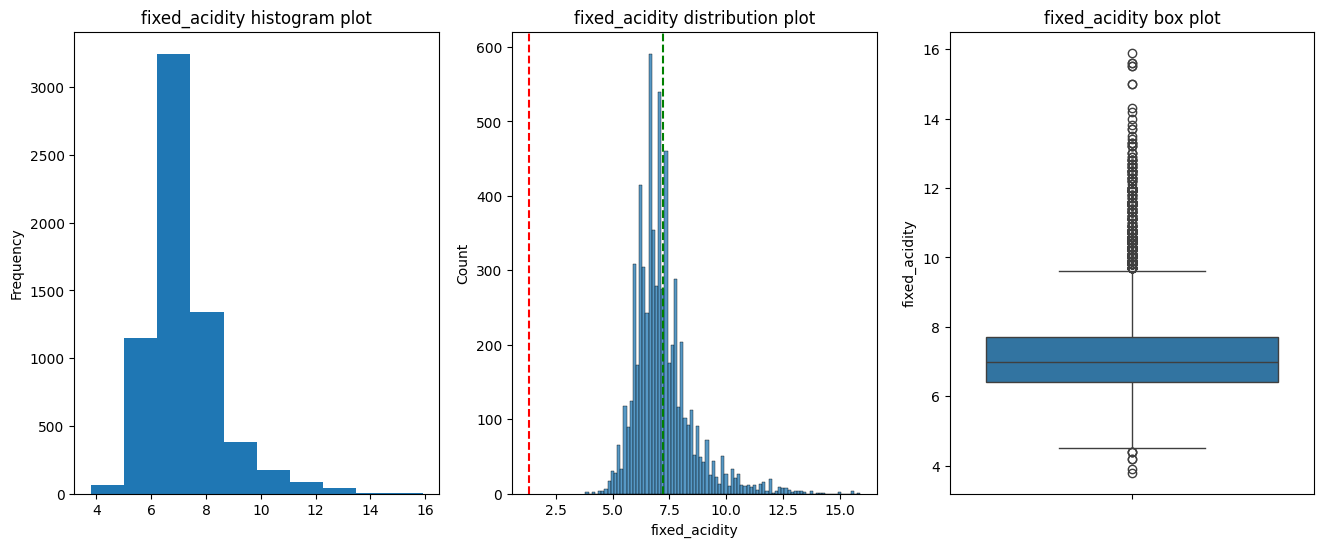

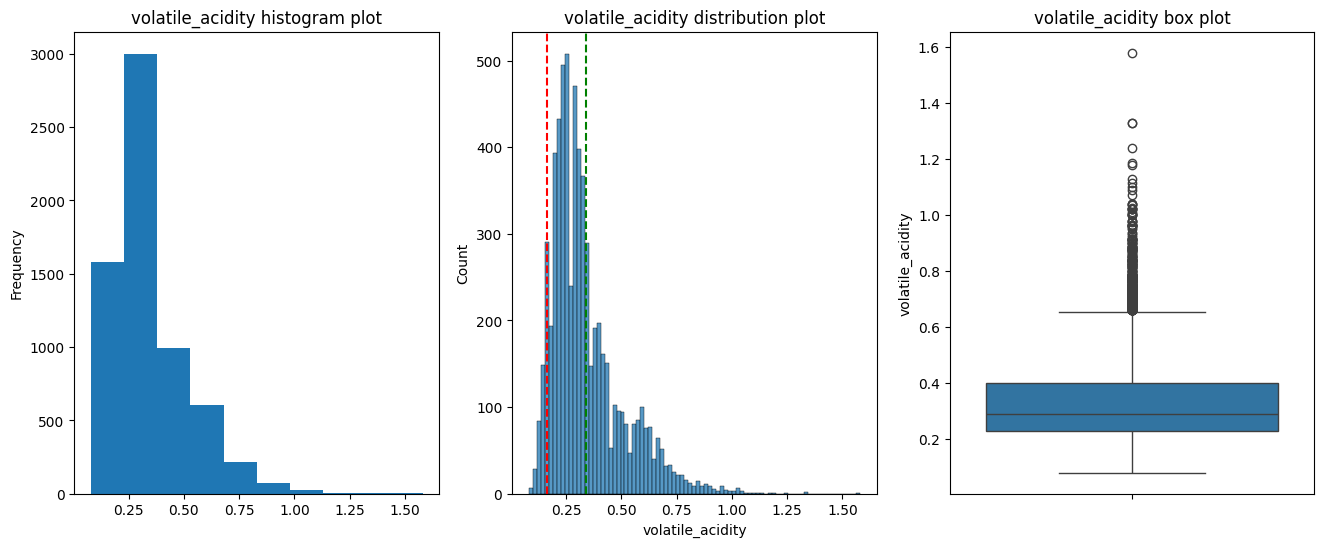

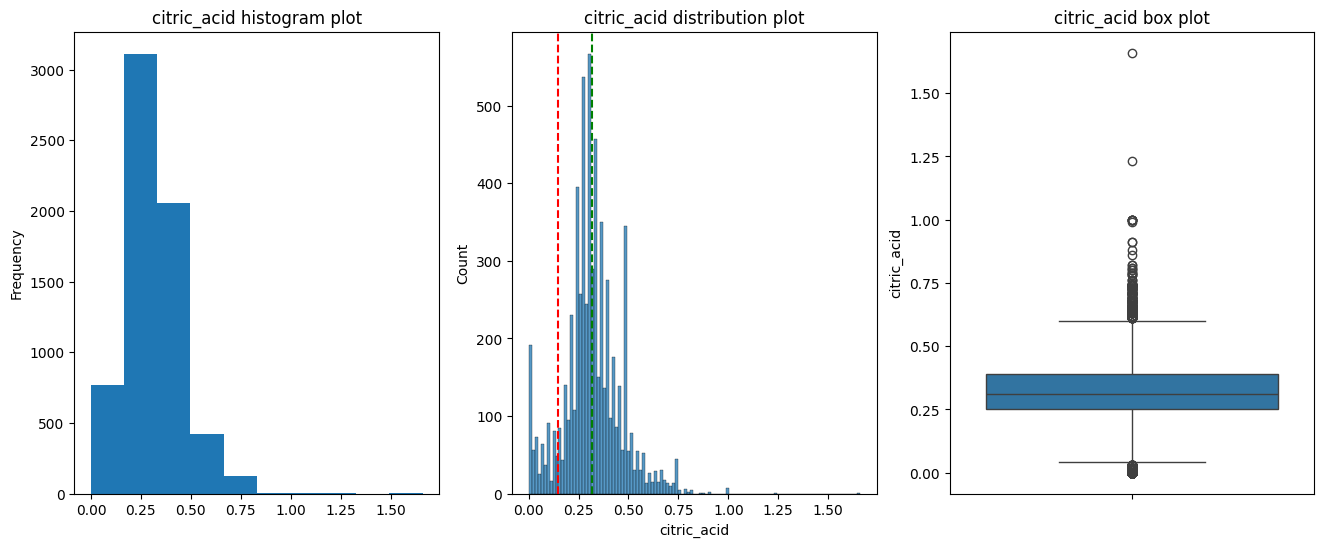

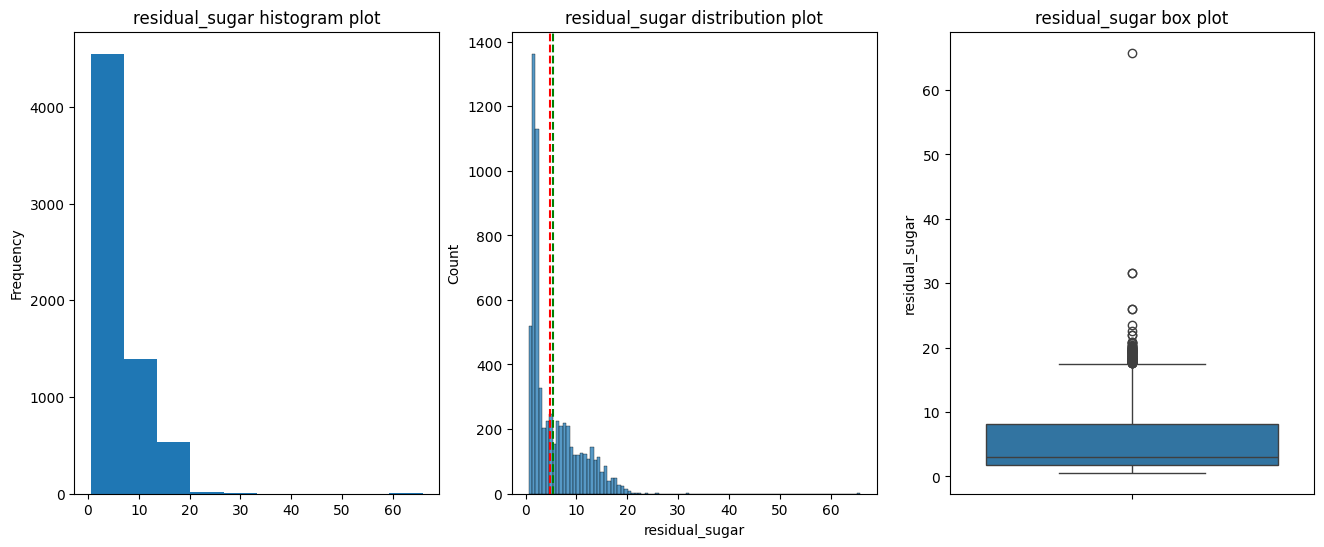

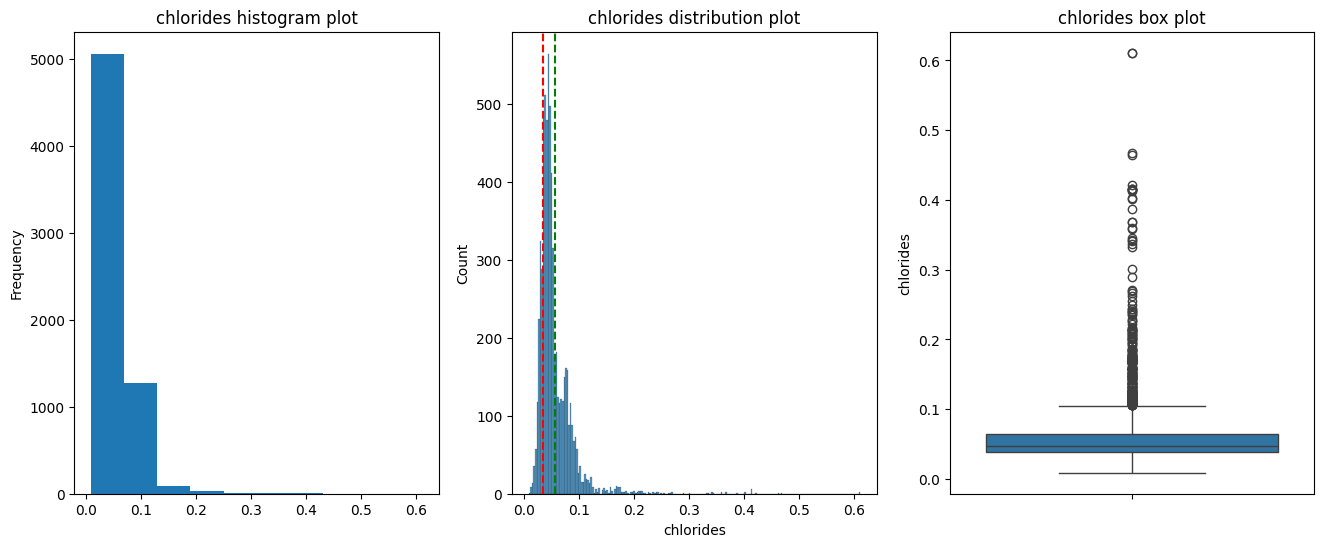

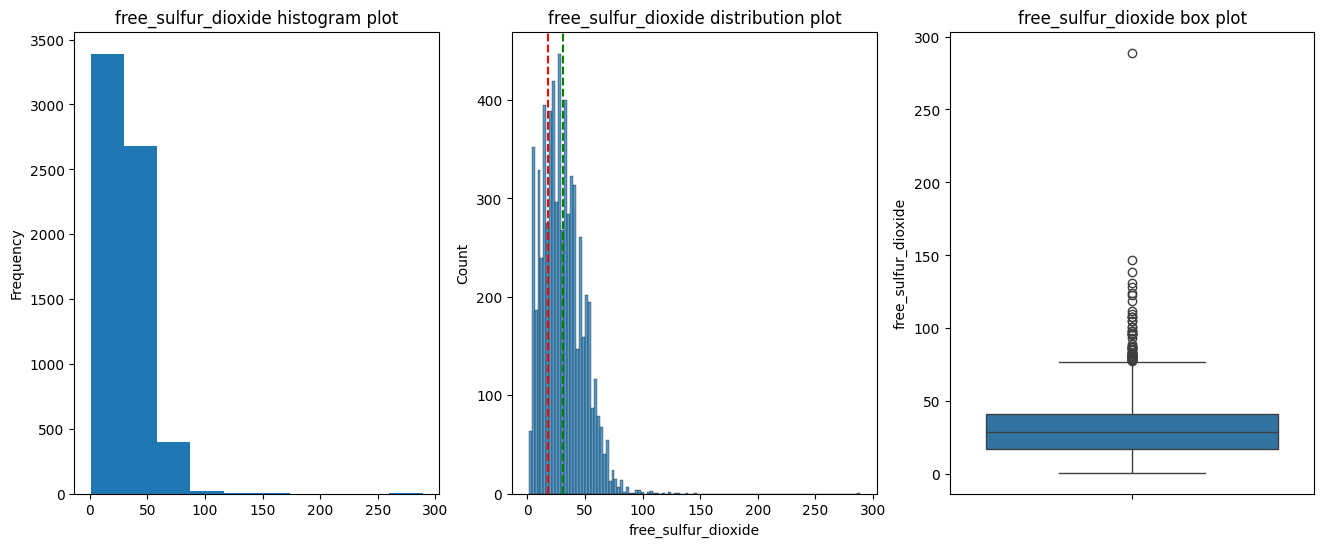

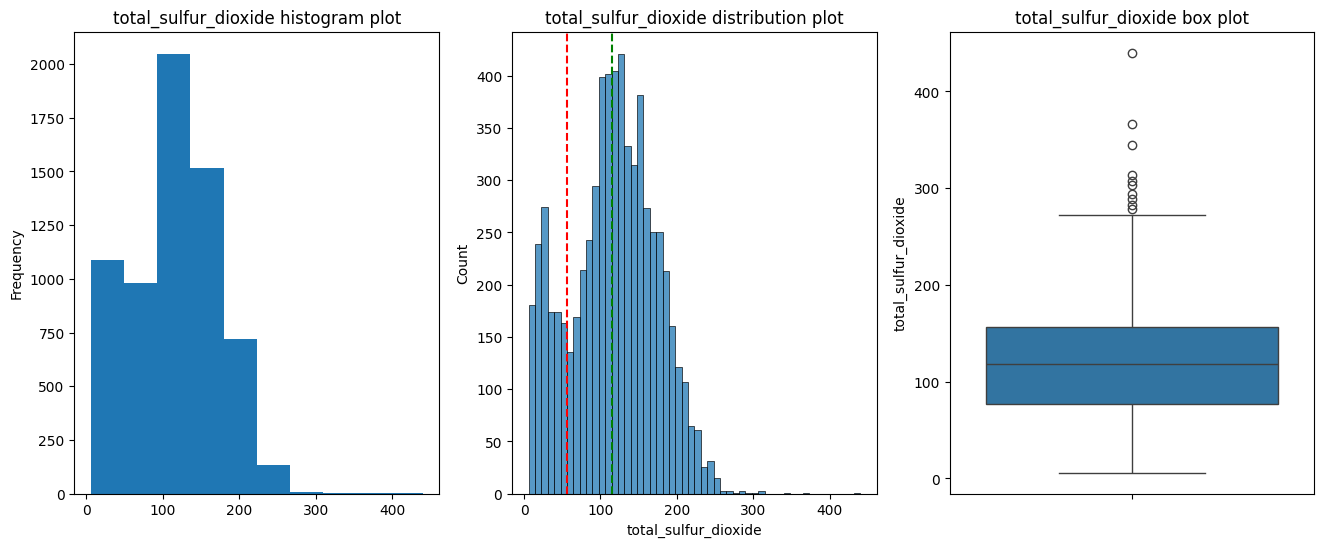

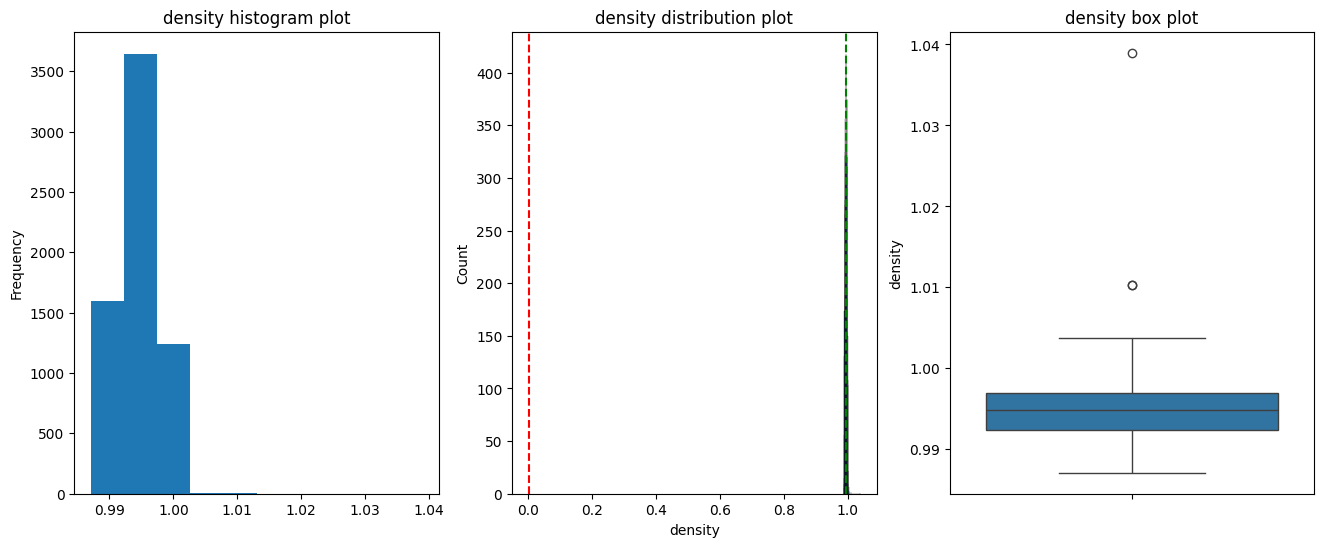

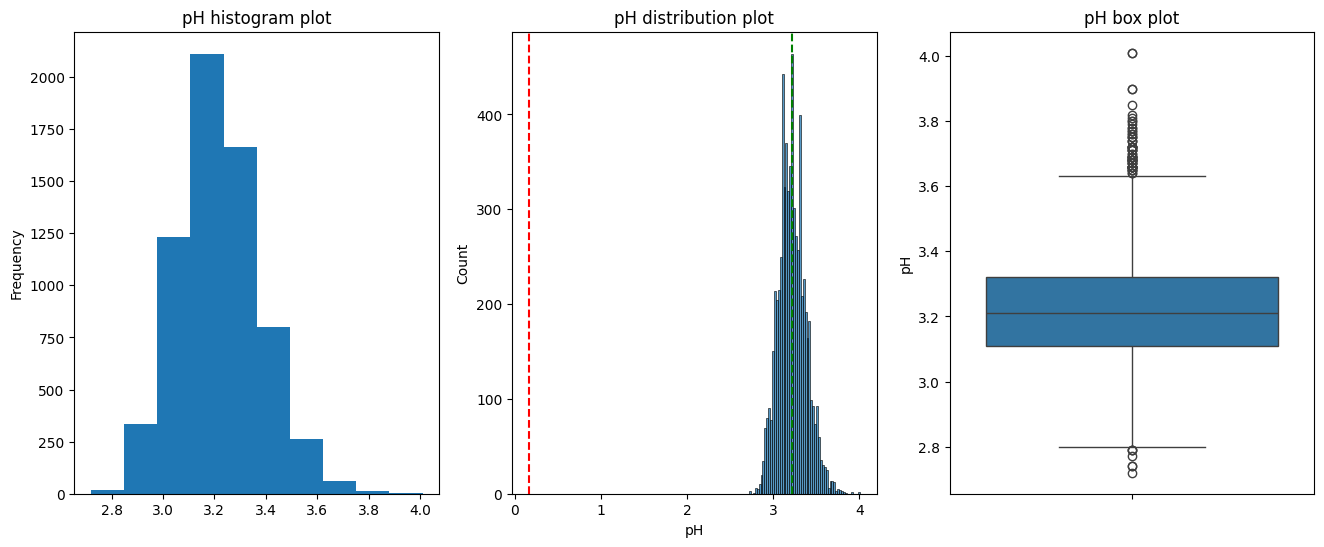

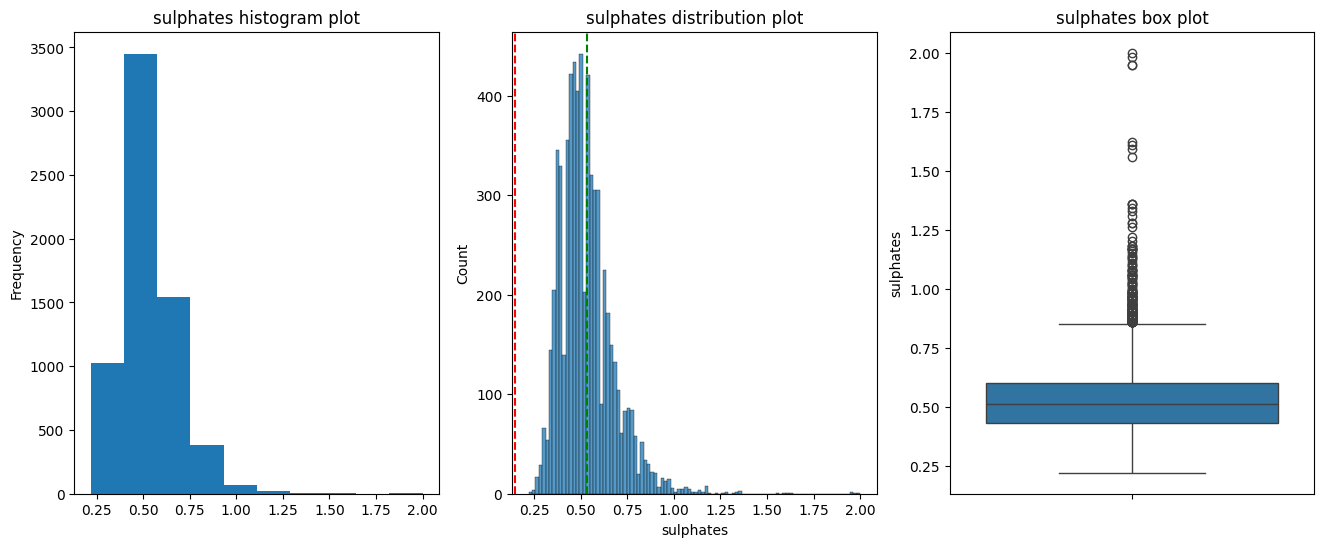

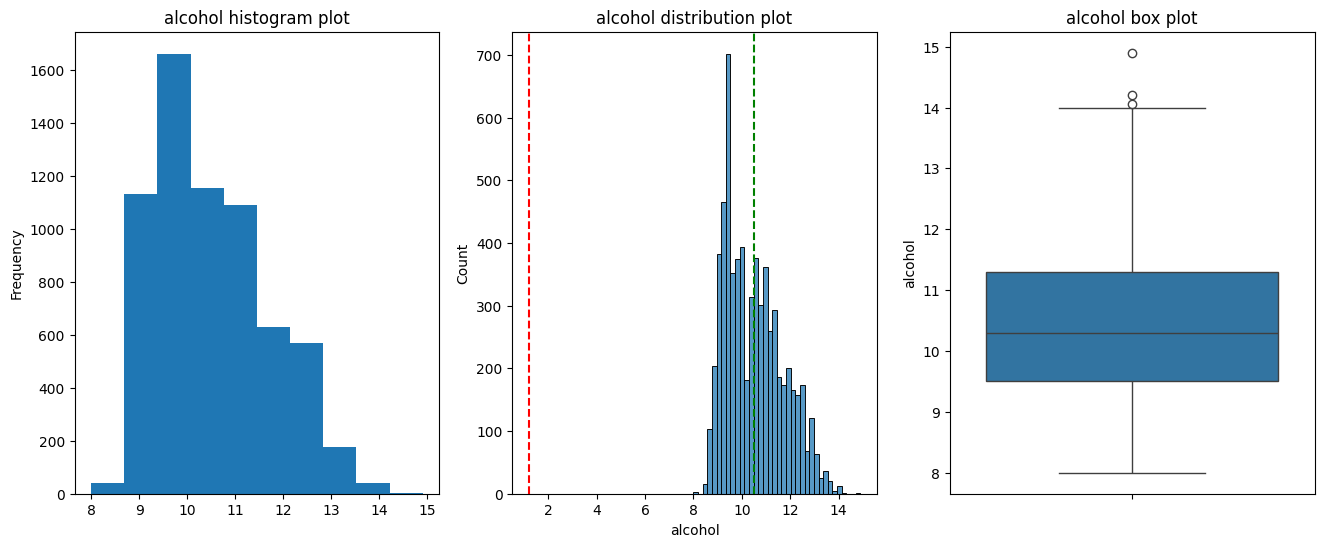

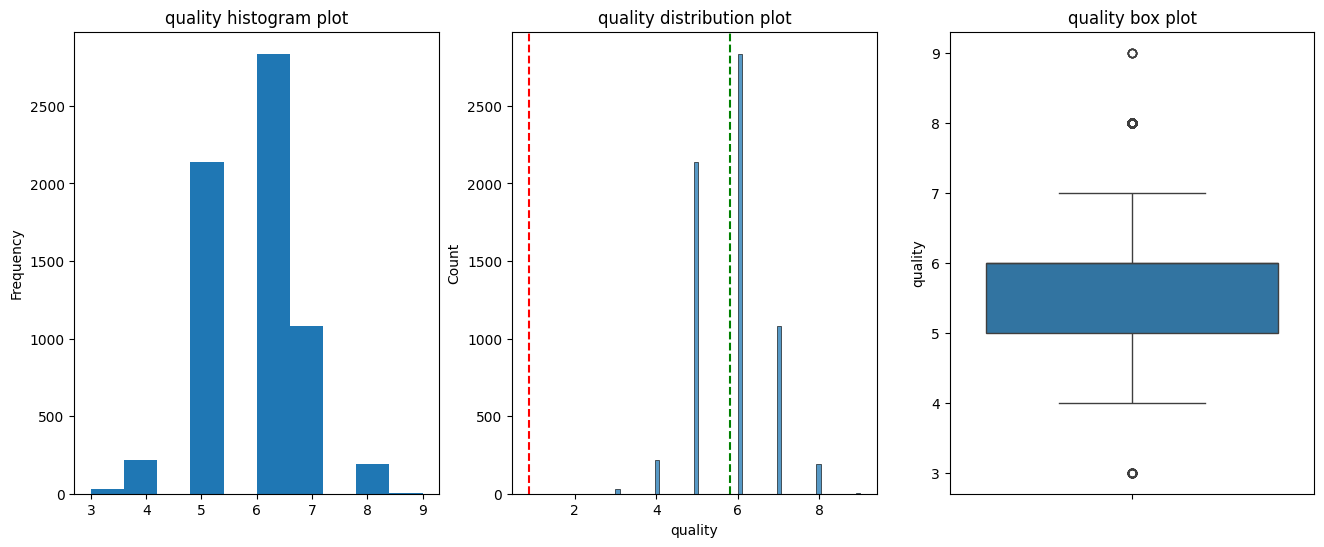

In [ ]:
for i in num_features.columns:
    features_plot(num_features[i])

Text(0.5, 0, 'Skewness')

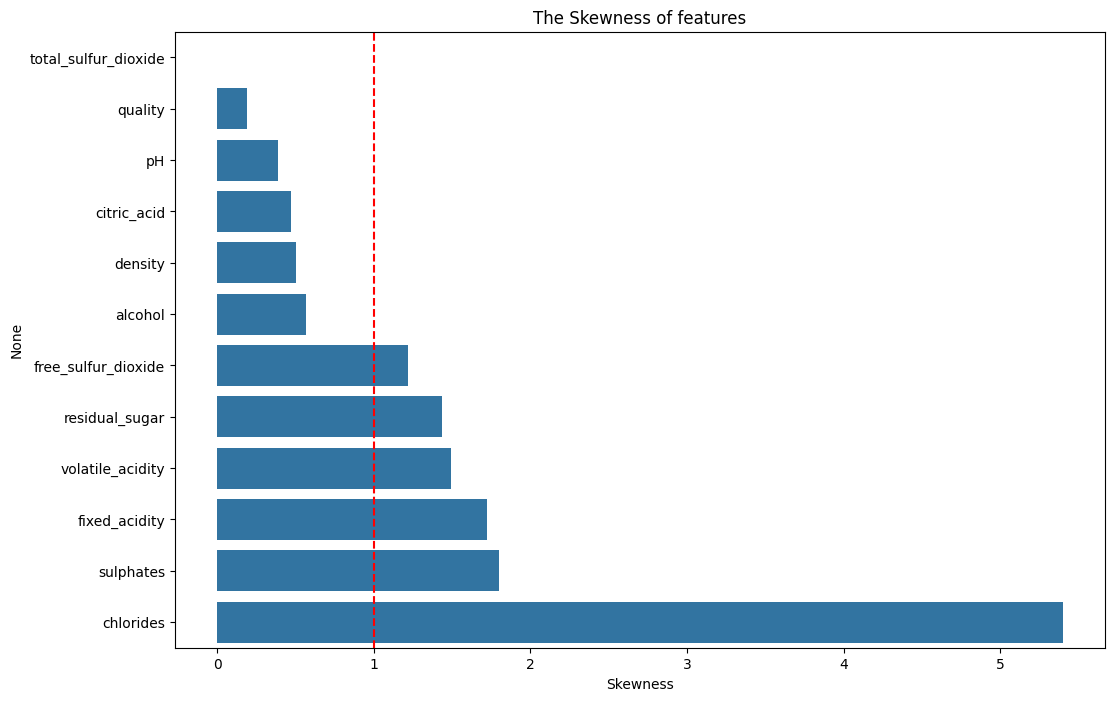

In [ ]:
plt.figure(figsize=(12,8))
skewness=df.select_dtypes(exclude = 'object').skew().sort_values()
sns.barplot(x=skewness,y=skewness.index).set_title('The Skewness of features')
plt.axvline(x=1, color='r', linestyle='--')
plt.xlabel('Skewness')

A distribution and outlier analysis was conducted to assess the features in the wine dataset. It is found that the characteristics 'fixed_acidity', 'residual_sugar', and 'chlorides' have the highest concentration of outliers, particularly in values greater than 12, 20, and 0.1, respectively. The 'alcohol' feature shows a moderate concentration around 10 with outliers above 13, while 'quality' exhibits a concentration around 6 with outliers above 7. Most features, including 'fixed_acidity' and 'residual_sugar', exhibit right-skewed distributions, while 'density' and 'pH' show fewer outliers and more uniform distributions. It is also noted that these outliers and skeweds may require further attention during preprocessing for modeling purposes.

Bivariable analysis

In [ ]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

<Axes: >

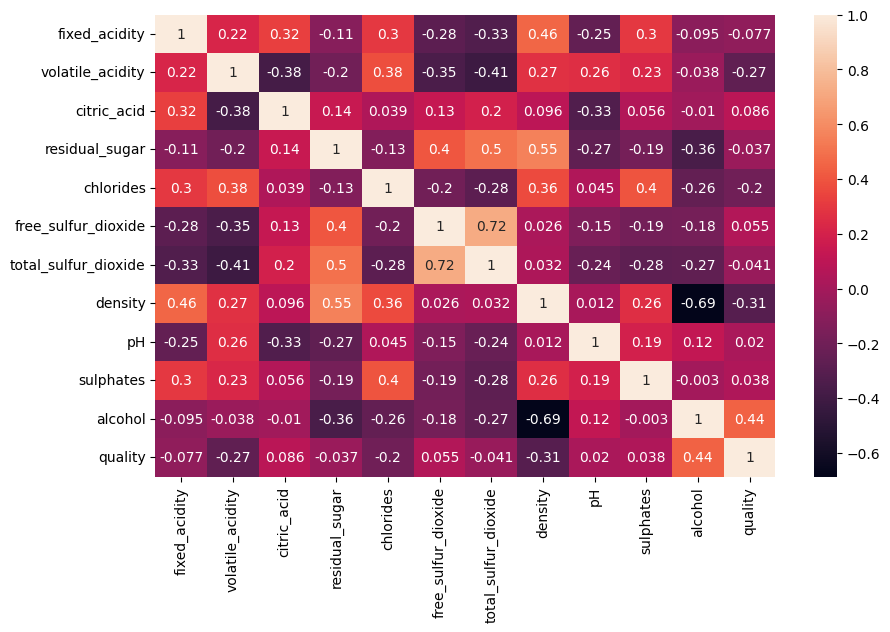

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(exclude = 'object').corr(), annot=True)

A correlation analysis was conducted to identify the variables that have the greatest weight on the target variable 'Quality'. It is found that the characteristics 'alcohol', 'density', 'chlorides', and 'volatile_acidity' have an impact greater than 20%. Alcohol has a direct relationship of 44%, while the other characteristics show an inverse relationship of 31%, 20%, and 27% respectively. It is also found that the other characteristics have either direct or inverse impact below 7.7%.

<Axes: >

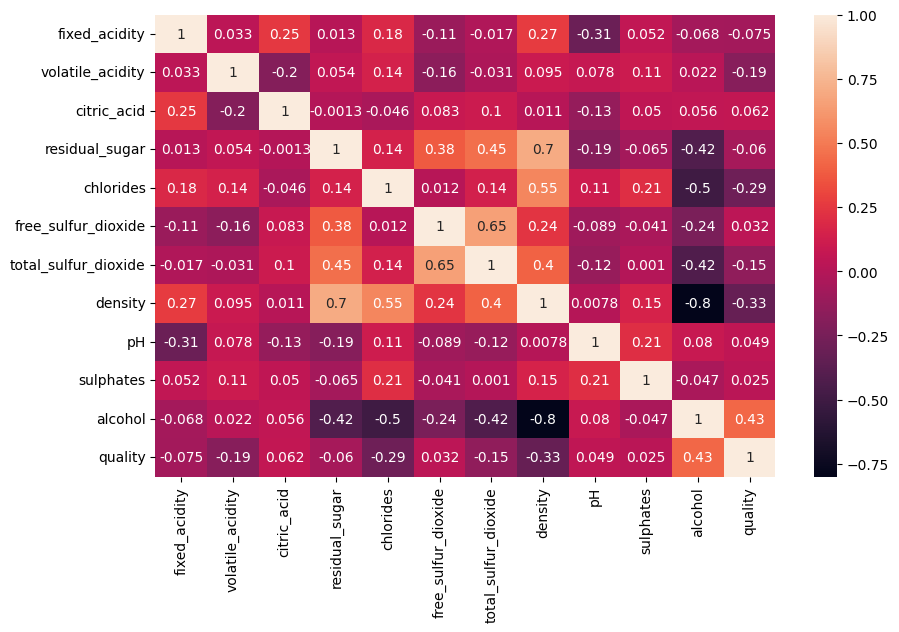

In [ ]:
#No-Linear correlation test
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(exclude = 'object').corr('spearman'), annot=True)

A non-linear correlation analysis of the characteristics was conducted. It was found that the characteristic total_sulfur_dioxide has a negative relationship of 15%, while density and residual sugar have a positive relationship of 70%. On the other hand, total_sulfur_dioxide and free_sulfur_dioxide also show a positive relationship of 65%.

With the above findings, it can be concluded that the characteristics with the greatest impact on wine quality are 'alcohol', 'density', 'chlorides', 'volatile_acidity' and 'total_sulfur_dioxide'. This is because they show a **greater linear or non-linear correlation** with the variable to be predicted. In this way, to reduce the multidimensionality of the model, only those features will be entered for training.

<Axes: >

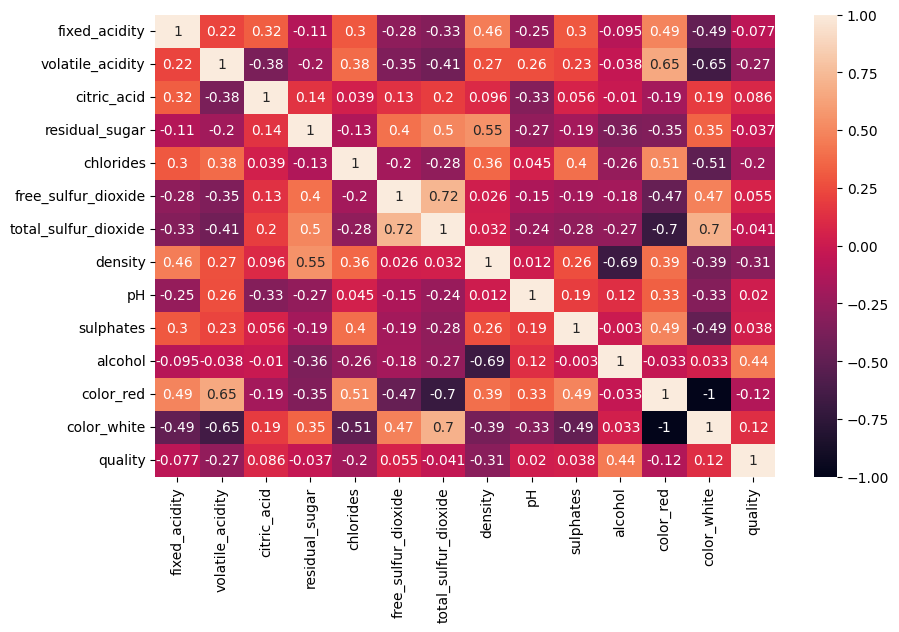

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(X.select_dtypes(exclude = 'object').corr(), annot=True)

The use of KMeans allows us to observe the grouping of the data, indicating that an approach with 3 categories could help manage the imbalance, and it may be necessary to define a new target that better groups the data.

In [ ]:
k_means= KMeans(n_clusters=3)
k_means.fit(df)
df['Newcategory']= k_means.fit_predict(df)
df['Newcategory'].value_counts()

,count
category,
0,2952
2,1920
1,1625


In [ ]:
df=df.drop(columns=['Newcategorycategory'])

# Data processing

Numeric features will be normalized using StandardScaler for consistent scaling and faster model convergence. Categorical features will be converted to numeric with One Hot Encoder.Skewed features will undergo a log transformation. Below are the transformation functions:

In [ ]:
def apply_log_transformation(df, columns):
    """
    Log transformation

    Args:
        df:DataFrame
        columns: List columns

    Return:
        DataFrame
    """
    for column in columns:
        if column in df.columns:

            df[column] = df[column].apply(lambda x: np.log(x) if x > 0 else np.nan)
    return df

In [ ]:
def transform_dataframe(df,target_column):
    """
    Transforms numerical variables using StandardScaler
    and categorical variables using OneHotEncoder.

    Args:
        df

    Returns:
        DataFrame
    """
     # Remove target

    df = df.drop(columns=[target_column])

    # Identify numerical and categorical columns
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Transform numerical variables
    scaler = StandardScaler()
    df_numeric_transformed = scaler.fit_transform(df[numeric_features])

    # Transform categorical variables
    onehot = OneHotEncoder(handle_unknown='ignore')
    df_categorical_transformed = onehot.fit_transform(df[categorical_features]).toarray()

    # Retrieve column names for transformed categorical variables
    cat_columns = onehot.get_feature_names_out(categorical_features)

    # Combine the results into a new DataFrame
    df_transformed = pd.DataFrame(
        np.hstack([df_numeric_transformed, df_categorical_transformed]),
        columns=numeric_features + list(cat_columns)
    )

    return df_transformed

In [ ]:
df=apply_log_transformation(df,['free_sulfur_dioxide', 'residual_sugar', 'volatile_acidity','fixed_acidity','sulphates','chlorides'])

In [ ]:
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,34.0,0.9978,3.51,-0.579818,9.4,5,red
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,67.0,0.9968,3.20,-0.385662,9.8,5,red
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,54.0,0.9970,3.26,-0.430783,9.8,5,red
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,60.0,0.9980,3.16,-0.544727,9.8,6,red
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,34.0,0.9978,3.51,-0.579818,9.4,5,red


<Axes: xlabel='quality', ylabel='count'>

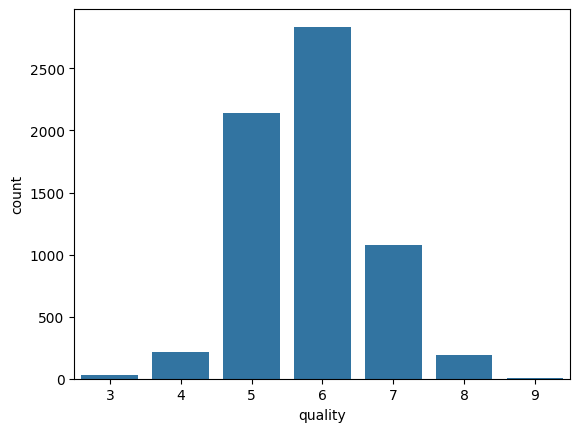

In [ ]:
sns.countplot(x=df['quality'])

New target variable:

*   Low: 0
*   Medium: 1
*   High: 2



In [ ]:
def new_target_tag(value):
    if value in [3, 4, 5]:
        return 0
    elif value == 6:
        return 1
    elif value in [7, 8, 9]:
        return 2
    else:
        return 'out of range'

In [ ]:
df['quality_cat']=df['quality'].apply(new_target_tag)

In [ ]:
y=df['quality_cat']

In [ ]:
X=transform_dataframe(df,'quality')

In [ ]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_red,color_white
0,2.384097,-0.632939,1.767431,-0.870701,2.544862,-0.262219,-1.495325,0.975829,1.325386,0.329527,-0.963373,1.0,0.0
1,-0.737006,1.052908,-1.768982,-0.954765,2.781730,-1.428671,-2.281962,0.512402,0.976005,0.608016,-1.047372,1.0,0.0
2,0.823546,1.251243,-0.884879,-0.870701,2.781730,-1.882291,-2.537087,0.761939,0.556748,0.886505,-0.879373,1.0,0.0
3,-0.016751,3.185009,-2.211033,0.999712,2.229037,0.450613,-1.006335,1.867035,1.744643,0.236697,-0.963373,1.0,0.0
4,1.423758,0.953741,-0.442827,-0.807653,1.676344,-1.299065,-2.133139,0.975829,0.207367,2.186122,-0.711373,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4413,-0.857048,-0.732107,-0.332314,-0.912733,-0.455472,-0.586233,-0.814990,-1.041861,0.486872,0.051037,0.548623,0.0,1.0
4414,-0.376878,0.358736,0.441276,0.432284,0.176177,1.552263,0.800804,0.298512,-0.351643,-0.320282,-0.795373,0.0,1.0
4415,-0.496921,-0.434604,-1.437443,-0.996796,-0.297560,-0.197416,-0.411042,-0.542786,-1.469662,-0.320282,-0.963373,0.0,1.0
4416,-1.697345,0.061233,-0.221801,-1.017812,-1.797727,-0.845445,-0.432302,-1.915243,0.976005,-1.062920,1.892619,0.0,1.0


In [ ]:
X=X.drop(columns=['quality_cat'])

# Training classifier

In [ ]:
X_select=X[['alcohol', 'density', 'chlorides', 'volatile_acidity','total_sulfur_dioxide','color_red','color_white']]

In [ ]:
X_train_select, X_test_select, y_train_select, y_test_select = train_test_split(X_select, y, test_size=0.2, random_state=82)

Training classifier

In [ ]:
#Random Forest
def train_random_forest(X_train, X_test, y_train, y_test, n_estimators=100, max_depth=None):
    """
    Trains a random forest model for multiclass classification

    Parameters:
    X_train: Training features
    X_test : testing features
    y_train: training labels (multiclass, values 0, 1, 2)
    y_test: testing labels
    n_estimators: number of trees in the fores

    Returns:
    model: trained random forest mode
    accuracy: model accuracy on the test set
    """

    # Model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,)

    # Training model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # classification report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Accuracy_Train: {train_accuracy:.2f}')
    print(f'Precision (weighted): {precision:.2f}')
    print(f'Recall (weighted): {recall:.2f}')
    print(f'F1 Score (weighted): {f1:.2f}')

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Feature importances
    feature_importances = model.feature_importances_
    indices = np.argsort(feature_importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
    plt.title("Feature Importances")
    plt.xlabel("Feature Index")
    plt.ylabel("Importance")
    plt.show()

    return model, accuracy



Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.59      0.63       278
           1       0.59      0.77      0.67       416
           2       0.69      0.35      0.46       190

    accuracy                           0.62       884
   macro avg       0.65      0.57      0.59       884
weighted avg       0.64      0.62      0.61       884

Accuracy: 0.62
Accuracy_Train: 0.77
Precision (weighted): 0.64
Recall (weighted): 0.62
F1 Score (weighted): 0.61


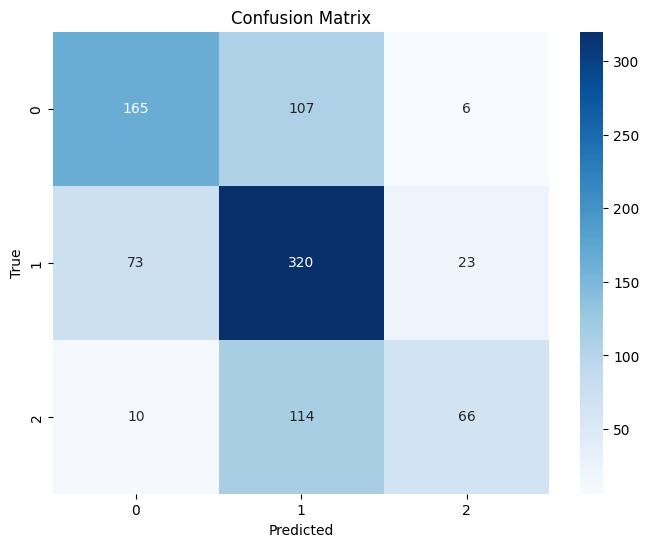

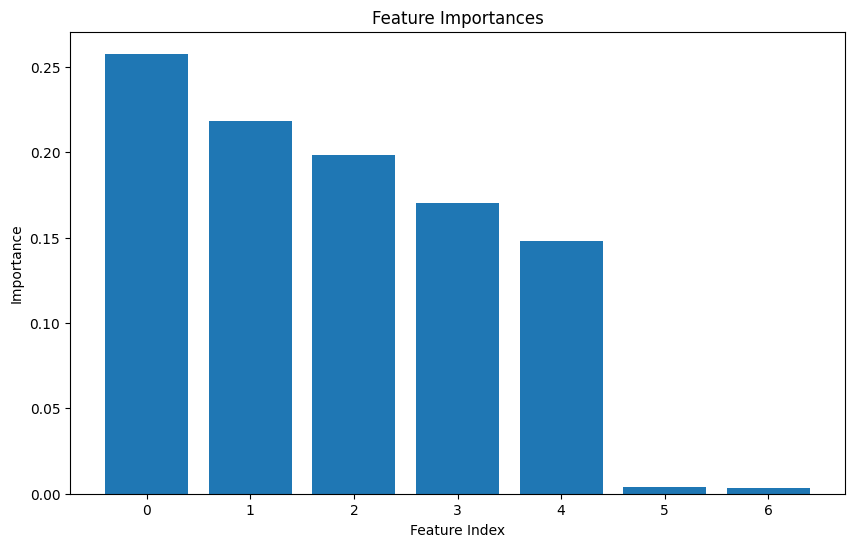

In [ ]:
model, accuracy = train_random_forest(X_train_select, X_test_select, y_train_select, y_test_select, n_estimators=100, max_depth=9)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.60      0.64       278
           1       0.60      0.79      0.68       416
           2       0.73      0.36      0.49       190

    accuracy                           0.64       884
   macro avg       0.67      0.58      0.60       884
weighted avg       0.66      0.64      0.63       884

Accuracy: 0.64
Accuracy_Train: 0.78
Precision (weighted): 0.66
Recall (weighted): 0.64
F1 Score (weighted): 0.63


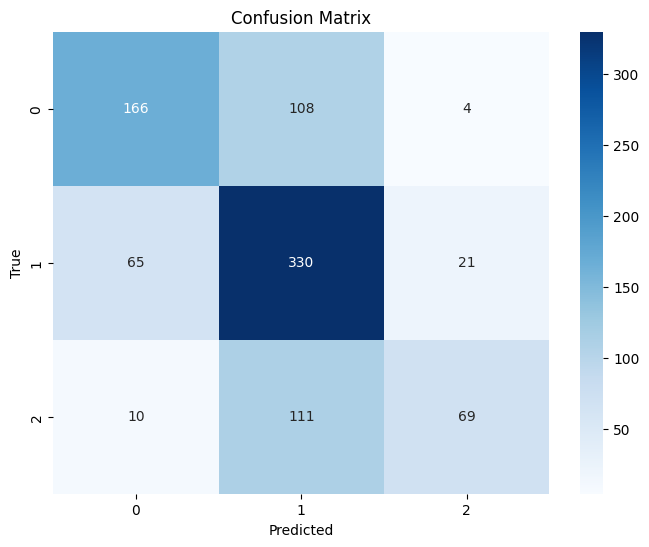

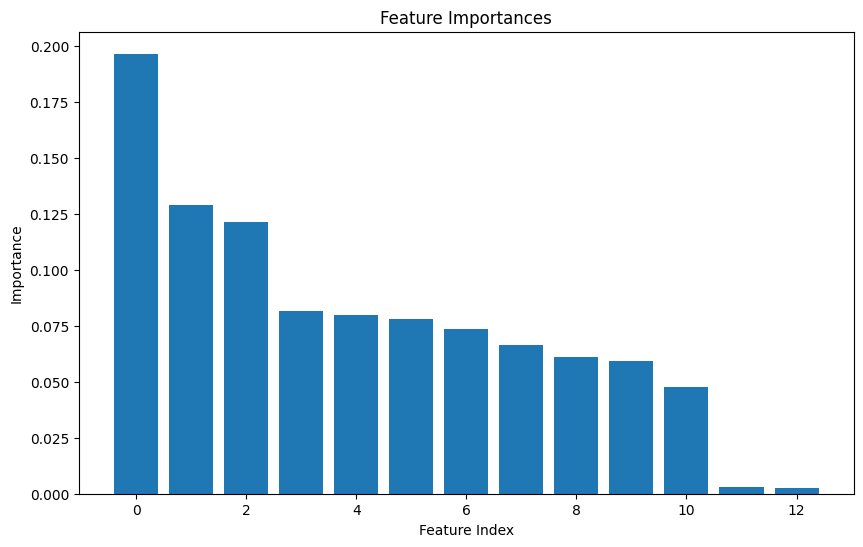

In [ ]:
model_RF, accuracy = train_random_forest(X_train, X_test, y_train, y_test, n_estimators=100, max_depth=8,)

In [ ]:
#ANN
def train_neural_network(X_train, X_test, y_train, y_test, epochs=100, batch_size=32, learning_rate=0.001):
    """
    Trains a neural network for multiclass clasification

    Args:
    X_train: Training features
    X_test: testing features
    y_train: Training labels
    y_test: Testing labels
    epochs: number of epochs to train the model
    batch_size: Batch size for training
    learning_rate: Learning rate for the optimizer

    Returns:
    model: trained neural networ model
    accuracy: model accuracy on the test set
    """

    #Labels to one-hot encoding format
    y_train = to_categorical(y_train, num_classes=3) #Fixed: Removed extra spaces before this line
    y_test = to_categorical(y_test, num_classes=3)

    # Neural network model
    model = Sequential()
    model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))  # Input layer with ReLU activation
    model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
    model.add(Dense(64, activation='relu'))  # Hidden layer
    model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
    model.add(Dense(3, activation='softmax'))  # Output layer with Softmax activation for multiclass classification


    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])


    # Train
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Plot training & validation loss values
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Predictions
    y_pred = model.predict(X_test)
    y_pred = y_pred.argmax(axis=1)  # Convert probabilities to class labels
    y_test_class = y_test.argmax(axis=1)

    # metrics
    accuracy = accuracy_score(y_test_class, y_pred)
    precision = precision_score(y_test_class, y_pred, average='weighted')
    recall = recall_score(y_test_class, y_pred, average='weighted')
    f1 = f1_score(y_test_class, y_pred, average='weighted')

    # classification report
    print("Classification Report:\n", classification_report(y_test_class, y_pred))
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (weighted): {precision:.2f}')
    print(f'Recall (weighted): {recall:.2f}')
    print(f'F1 Score (weighted): {f1:.2f}')

    # Confusion matrix
    cm = confusion_matrix(y_test_class, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return model, accuracy

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4214 - loss: 1.1071 - val_accuracy: 0.5373 - val_loss: 0.9496
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5191 - loss: 0.9687 - val_accuracy: 0.5407 - val_loss: 0.9335
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5405 - loss: 0.9177 - val_accuracy: 0.5724 - val_loss: 0.9122
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5571 - loss: 0.9065 - val_accuracy: 0.5758 - val_loss: 0.9059
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5734 - loss: 0.8816 - val_accuracy: 0.5690 - val_loss: 0.9022
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5626 - loss: 0.8849 - val_accuracy: 0.5713 - val_loss: 0.9029
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5534 - loss: 0.8807 - val_accuracy: 0.5724 - val_loss: 0.8957
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5703 - loss: 0.8685 - val_accuracy: 0.5543

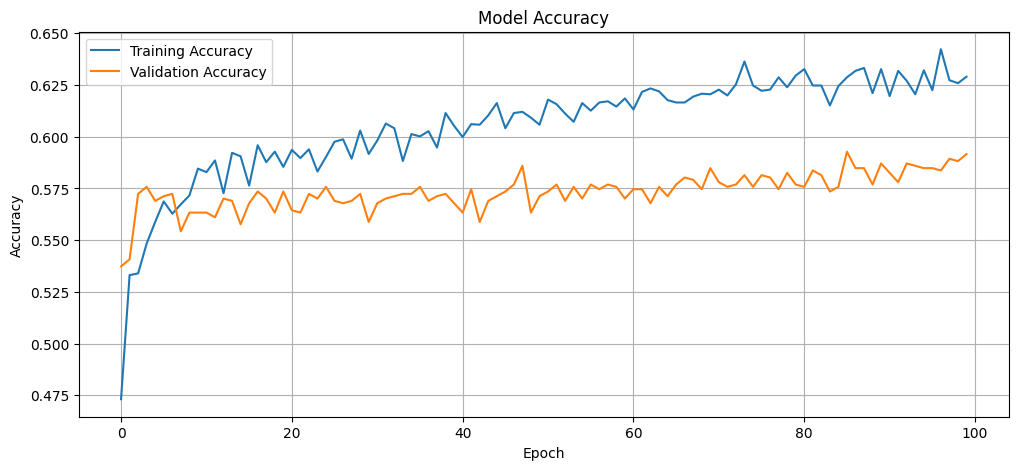

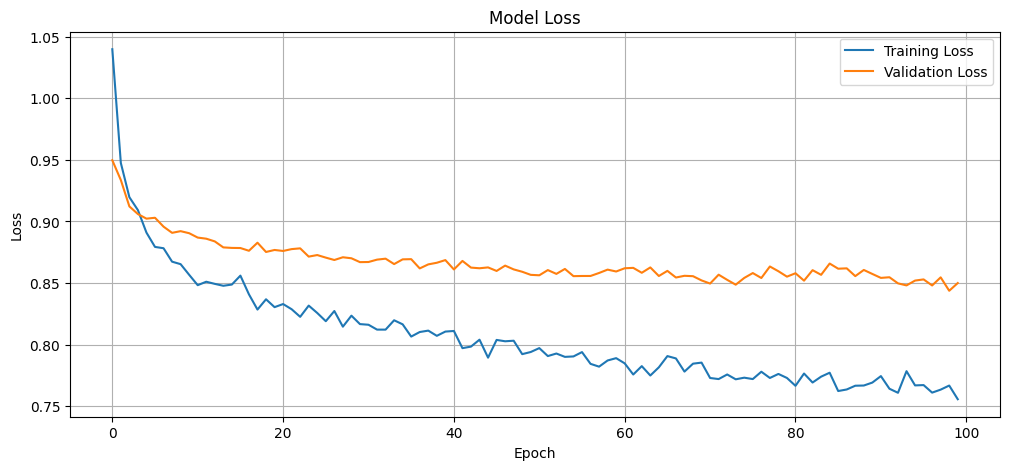

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.59      0.61       278
           1       0.56      0.73      0.63       416
           2       0.66      0.30      0.41       190

    accuracy                           0.59       884
   macro avg       0.62      0.54      0.55       884
weighted avg       0.61      0.59      0.58       884

Accuracy: 0.59
Precision (weighted): 0.61
Recall (weighted): 0.59
F1 Score (weighted): 0.58


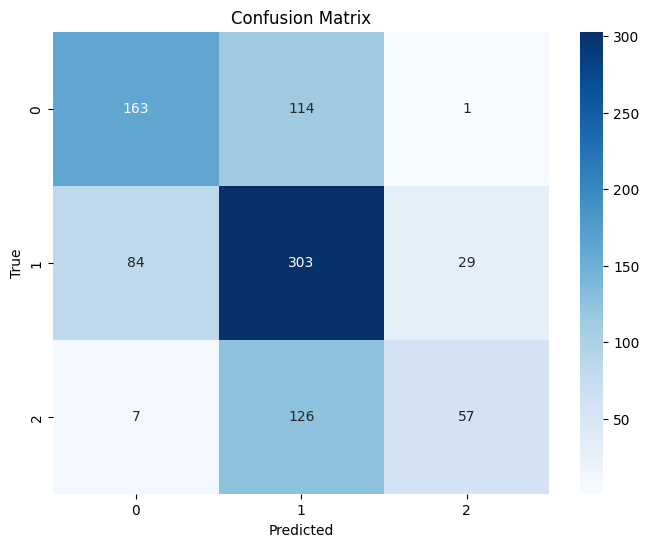

In [ ]:
model_ANN, accuracy = train_neural_network(X_train, X_test, y_train, y_test)

Two models were trained; Random Forest and ANN, both with default hypThe performance of both models was evaluated using classification metrics. While both demonstrated potential, Random Forest outperformed the neural network by approximately 10 percentage points across all metrics. Despite its superior classification ability, the Random Forest struggled to accurately distinguish between low ("0") and high ("2") quality classes from medium quality, leading to a significant number of misclassifications for these categories.

Random Forest:
*   Accuracy: 69%
*   Precision (weighted): 67%
*   Recall (weighted): 67%
*   F1 Score (weighted): 67%





# Optimization of selected model

In [ ]:
from skopt import BayesSearchCV

In [ ]:
# Dic parameters
param_space ={
    'n_estimators': (10, 200),
    'max_depth': [1, 5,7,8,9 ,10, 11, 15],
    'min_samples_split': (2, 20),
    'min_samples_leaf': (2, 20),
    'max_features': ['sqrt', 'log2'],
}

In [ ]:
model = RandomForestClassifier(random_state=42)
opt = BayesSearchCV(model, param_space, n_iter=50, cv=5, n_jobs=-1, random_state=42, scoring='f1_weighted')
opt.fit(X_train, y_train)

# Resultados
print("Mejores parámetros encontrados: ", opt.best_params_)
print("Mejor puntuación de f1_weighted: ", opt.best_score_)


Mejores parámetros encontrados:  OrderedDict([('max_depth', 11), ('max_features', 'log2'), ('min_samples_leaf', 2), ('min_samples_split', 4), ('n_estimators', 46)])
Mejor puntuación de precisión:  0.6636343117320519


In [ ]:
model = RandomForestClassifier(random_state=42)
opt = BayesSearchCV(model, param_space, n_iter=50, cv=5, n_jobs=-1, random_state=42, scoring='accuracy')
opt.fit(X_train, y_train)

# Resultados
print("Mejores parámetros encontrados: ", opt.best_params_)
print("Mejor puntuación de precisión: ", opt.best_score_)


Mejores parámetros encontrados:  OrderedDict([('max_depth', 75), ('max_features', 'log2'), ('min_samples_leaf', 2), ('min_samples_split', 2), ('n_estimators', 115)])
Mejor puntuación de precisión:  0.6946824751273184


In [ ]:
#RF
def train_random_forest_opti(X_train, X_test, y_train, y_test, n_estimators=100, max_depth=None):
    """
    Trains a random forest model for multiclass classification

    Parameters:
    X_train: Training features
    X_test : testing features
    y_train: training labels (multiclass, values 0, 1, 2)
    y_test: testing labels
    n_estimators: number of trees in the fores

    Returns:
    model: trained random forest mode
    accuracy: model accuracy on the test set
    """

    # Model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,max_features='log2', min_samples_leaf= 2,min_samples_split=4)

    # Training model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # classification report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Accuracy_Train: {train_accuracy:.2f}')
    print(f'Precision (weighted): {precision:.2f}')
    print(f'Recall (weighted): {recall:.2f}')
    print(f'F1 Score (weighted): {f1:.2f}')

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Feature importances
    feature_importances = model.feature_importances_
    indices = np.argsort(feature_importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
    plt.title("Feature Importances")
    plt.xlabel("Feature Index")
    plt.ylabel("Importance")
    plt.show()
    return model, accuracy

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.63      0.67       278
           1       0.63      0.81      0.71       416
           2       0.79      0.44      0.56       190

    accuracy                           0.67       884
   macro avg       0.71      0.63      0.65       884
weighted avg       0.69      0.67      0.67       884

Accuracy: 0.67
Accuracy_Train: 0.89
Precision (weighted): 0.69
Recall (weighted): 0.67
F1 Score (weighted): 0.67


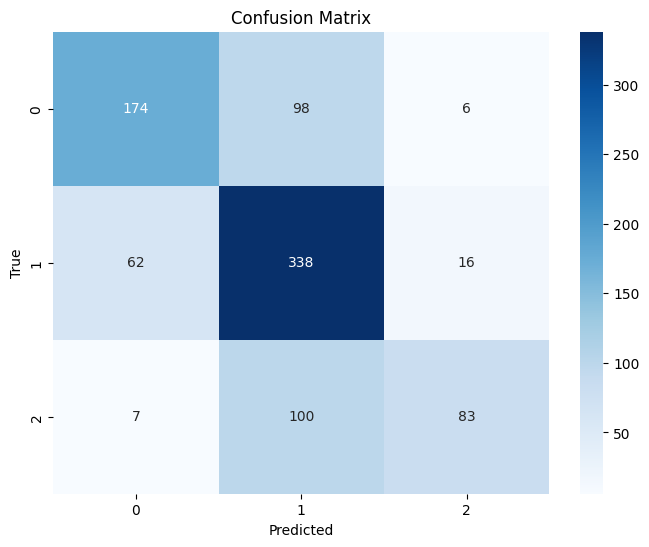

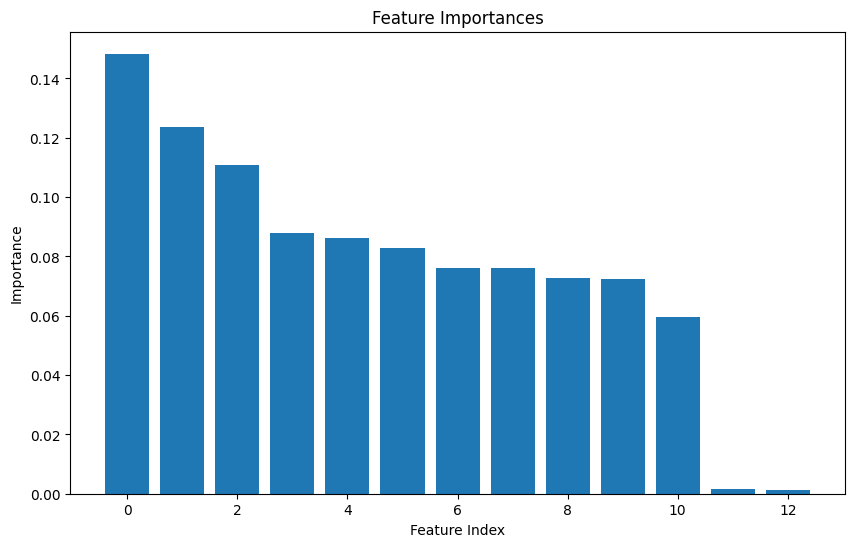

In [ ]:
model_optimize, accuracy = train_random_forest_opti(X_train, X_test, y_train, y_test, n_estimators=100, max_depth=11)

# Problems with the model

The trained model exhibits a high sensitivity to overfitting, primarily due to the data, which is highly imbalanced and contains a significant amount of noise (outliers). As a first solution to this problem, improving the data and its labeling is essential. Engineering techniques can also be employed to eliminate irrelevant or biased data. The selected model had to be penalized by reducing the max_depth parameter to avoid overfitting.

The classification model struggles to adequately recognize the categories, especially for the low (0) and high (2) categories. A new labeling process is needed to identify the differential elements that can separate these two Categories from the medium (1) quality.

The model showed no signs of improvement when a hyperparameter estimation was made. This could be another area for improvement, by making a robust parameter estimation that allows the model to adequately capture the patterns in the data.






# References


1.   M. Beri, K. S. Gill and N. Sharma, "Predictive Modeling of Wine Quality using Machine Learning Techniques," 2024 Second International Conference on Intelligent Cyber Physical Systems and Internet of Things (ICoICI), Coimbatore, India, 2024, pp. 1017-1022, doi: 10.1109/ICoICI62503.2024.10696690.


2.   Arshad, H. (2024). The Wine Quality Prediction Using Machine Learning. Journal of Innovative Computing and Emerging Technologies, 4(2).

3.  Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.




